In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('feature_energyy_48k_1024.csv')

In [4]:
train_data, test_data = train_test_split(df, test_size = 750, stratify = df['fault'],
                                         random_state = 1288)

In [5]:
train_data

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest factor,form factor,fault
3657,3657,14.080692,0.000100,2.525807,5.117041,5.412097,1.390457,0.319956,2.601707,2.142720,OR014
410,410,10.910429,0.000043,2.670121,4.914991,5.316676,0.947659,-1.204088,2.052115,1.991174,B007
950,950,18.515451,0.000081,3.615942,7.010705,7.488744,1.206415,-0.295578,2.472438,2.071035,B021
1554,1554,36.257926,0.000226,8.212663,15.022530,16.276200,0.999099,-1.016150,2.227665,1.981842,IR007
1176,1176,25.919623,0.000064,4.361321,9.249996,9.689594,1.519237,0.732054,2.674996,2.221711,B021
...,...,...,...,...,...,...,...,...,...,...,...
278,278,8.923791,0.000054,1.910248,3.579794,3.855140,1.053855,-0.825453,2.314777,2.018136,B007
3643,3643,9.453025,0.000082,2.276461,4.180687,4.525003,0.952751,-1.185354,2.089065,1.987736,OR014
3270,3270,9.609071,0.000115,2.252004,4.155394,4.492261,0.964621,-1.143100,2.139028,1.994784,OR014
1147,1147,32.243381,0.000037,5.402162,11.494720,12.033115,1.527907,0.759191,2.679554,2.227463,B021


In [6]:
tree_clf = DecisionTreeClassifier(random_state = 532)

In [7]:
tree_clf.fit(train_data.iloc[:,:-1], train_data['fault'])

DecisionTreeClassifier(random_state=532)

In [8]:
train_predictions = tree_clf.predict(train_data.iloc[:,:-1])
test_predictions = tree_clf.predict(test_data.iloc[:,:-1])

In [15]:
train_predictions

array(['OR014', 'B007', 'B021', ..., 'OR014', 'B021', 'OR014'],
      dtype=object)

In [9]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  1.0


In [10]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

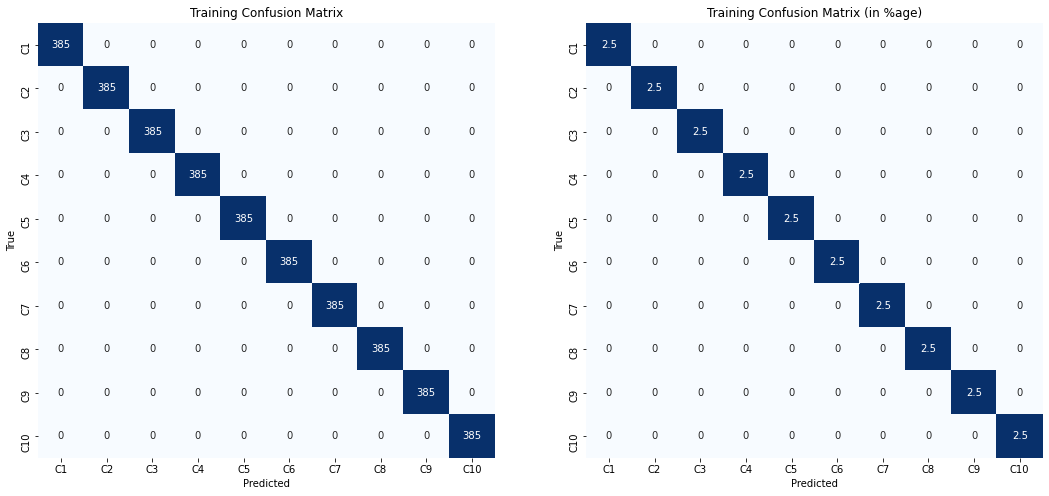

In [11]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()    

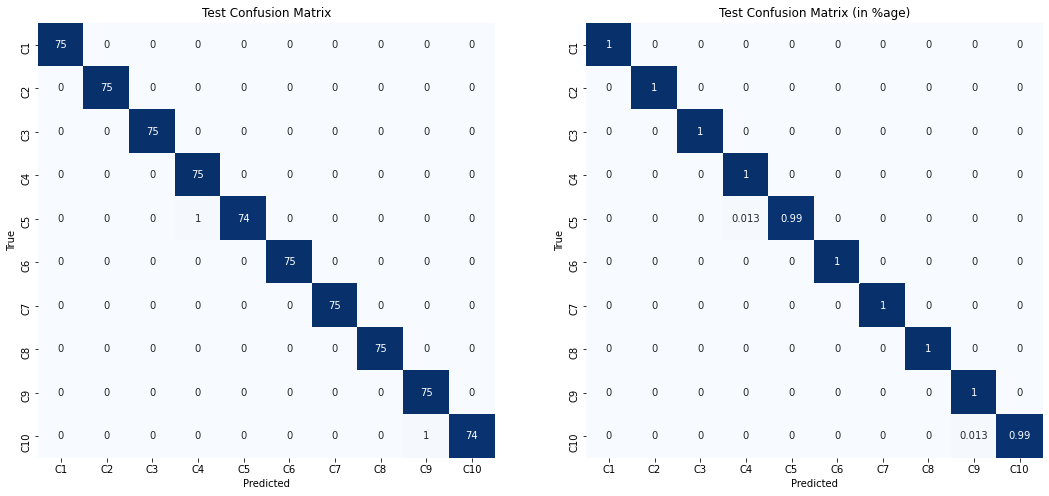

In [12]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9973333333333333


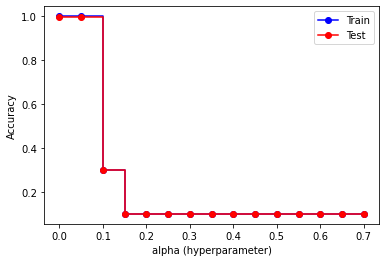

In [14]:
ccp_alphas = np.linspace(0, 0.7, num = 15)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_data.iloc[:,:-1], train_data['fault'])
    clfs.append(clf)

train_scores = [clf.score(train_data.iloc[:,:-1], train_data['fault']) for clf in clfs]
test_scores = [clf.score(test_data.iloc[:,:-1], test_data['fault']) for clf in clfs]
plt.figure()
plt.plot(ccp_alphas, train_scores,'-o', color = "blue", label = "Train", drawstyle = "steps-post")
plt.plot(ccp_alphas, test_scores, '-o', color = "red", label = "Test", drawstyle = "steps-post")
plt.xlabel("alpha (hyperparameter)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()